In [36]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go

init_notebook_mode(connected=True)


train_path = "res/dota2Train.csv"
test_path = "res/dota2Test.csv"
result_folder = "results/"

test_set_ratio = 0.1 

   

Preprocessing
--------------

In [50]:
from sklearn import preprocessing 

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
#df_train.pop("cid")
#df_test.pop("cid")
#df_train.pop("gmode")
#df_train.pop("gtype")
#df_test.pop("gmode")
#df_test.pop("gtype")
#df_train=df_train.values
#f_test=df_test.values

#df_train = pd.DataFrame(df_train, columns = cols)

#df_train = preprocessing.scale(df_train)
#df_test= preprocessing.scale(df_test)
#a=df_train
#a[:,1:]
#b = preprocessing.scale(a[:,1:], axis=0, with_mean=True, with_std=True, copy=True)

#df_train = np.concatenate((df_train[:,0:1],b),axis=1)
#a=df_test
#a[:,1:]
#b = preprocessing.scale(a[:,1:], axis=0, with_mean=True, with_std=True, copy=True)
#dF_test=np.concatenate((df_test[:,0:1],b),axis=1)

#df_train[:,2:] = np.where(df_train[:,2:] < 0, 2, df_train[:,2:])
#df_train[:,0] = np.where(df_train[:,0] < 0, 0, df_train[:,0] )
#df_test[:,2:] = np.where(df_test[:,2:] < 0, 2, df_test[:,2:])
#df_test[:,0] = np.where(df_test[:,0]  < 0, 0, df_test[:,0] )
#a = preprocessing.scale(df_train[:,1:], axis=0, with_mean=True, with_std=True, copy=True)
#b =  preprocessing.scale(df_test[:,1:], axis=0, with_mean=True, with_std=True, copy=True)
#df_ = np.concatenate((df_train[:,0],a),axis=1)
#df_test = np.concatenate(df_test[:,0],axis=1)
#df_ = pd.DataFrame(df_, columns = cols)

Precision | Recall
-------------

In [54]:
from sklearn.model_selection import cross_validate
from sklearn.datasets import  load_iris
from sklearn.svm import SVC

iris = load_iris()
clf = DecisionTreeClassifier()
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,
                         cv=10, return_train_score=True)
print(scores.keys())
print(scores['test_acc'])  

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro'])
[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]


In [51]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler


#df_vars = df_vars_all.drop('win', axis=1)


df_vars_all = df_train.loc[:, df_train.columns != 'win']
#df_vars = df_vars_all.drop('win', axis=1)
#df_vars_scaled = preprocessing.scale(df_vars)
scaler = MinMaxScaler()
scaler.fit(df_vars_all)
df_vars_all=scaler.transform(df_vars_all)
df_class = df_train['win']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Initialize Training data

### Simple cross validation for well-founded results

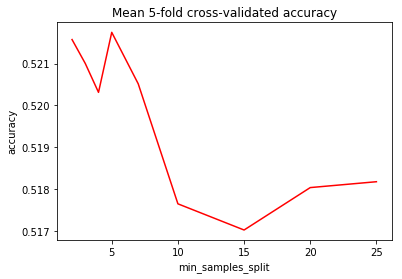

In [7]:
min_samples_splits = [2,3,4,5,7,10,15,20,25]
results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(clf, df_vars, df_class, cv=5)
    results.append(scores['test_score'].mean())
    
plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.title("Mean 5-fold cross-validated accuracy")
plt.show()

### Model fitting and sample testing

In [8]:
df_vars_all = df_train.loc[:, df_train.columns != 'win']
df_vars=df_vars_all
#df_vars = df_vars_all.drop('win', axis=1)
df_vars_scaled = preprocessing.scale(df_vars)
df_class = df_train['win']

names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]

classifiers = [
    NearestCentroid(),
    LinearSVC(),
    DecisionTreeClassifier(),
    GaussianNB()]

for name, clf in zip(names, classifiers):
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5)['test_score']
    print(name, "Unscaled", scores.mean())
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars_scaled, df_class, cv=5)['test_score']
    print(name, "Scaled", scores.mean())

0.5211009174311927

### Final prediction

In [10]:
df_res = pd.DataFrame()
df_test_dropped = df_test.drop(['win'], axis=1)
df_res['ID'] = df_test_dropped['ID']
df_res['win'] = pd.Series(model.predict(df_test_dropped))
print(df_test_dropped.index)
df_res.head(10)
print(df_res)
np.count_nonzero(df_res['win']==df_test['win'])

RangeIndex(start=0, stop=10294, step=1)
           ID  win
0       92650   -1
1       92651    1
2       92652    1
3       92653    1
4       92654   -1
5       92655   -1
6       92656   -1
7       92657   -1
8       92658    1
9       92659   -1
10      92660    1
11      92661    1
12      92662    1
13      92663   -1
14      92664    1
15      92665   -1
16      92666    1
17      92667   -1
18      92668   -1
19      92669    1
20      92670   -1
21      92671    1
22      92672    1
23      92673    1
24      92674   -1
25      92675    1
26      92676    1
27      92677    1
28      92678   -1
29      92679   -1
...       ...  ...
10264  102914    1
10265  102915    1
10266  102916    1
10267  102917   -1
10268  102918   -1
10269  102919   -1
10270  102920   -1
10271  102921   -1
10272  102922   -1
10273  102923   -1
10274  102924    1
10275  102925   -1
10276  102926    1
10277  102927    1
10278  102928    1
10279  102929    1
10280  102930   -1
10281  102931    1
10282  102

5310

### Export

In [80]:
export_file_name = result_folder + "simple_dt.csv"
df_res.to_csv(export_file_name, index=False)

Scaled vs Unscaled
-------------

In [7]:
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.svm import LinearSVC

df_vars_all = df_train.loc[:, df_train.columns != 'win']
df_vars=df_vars_all
#df_vars = df_vars_all.drop('win', axis=1)
df_vars_scaled = preprocessing.scale(df_vars)
df_class = df_train['win']

names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]

classifiers = [
    NearestCentroid(),
    LinearSVC(),
    DecisionTreeClassifier(),
    GaussianNB()]

for name, clf in zip(names, classifiers):
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5)['test_score']
    print(name, "Unscaled", scores.mean())
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars_scaled, df_class, cv=5)['test_score']
    print(name, "Scaled", scores.mean())

Nearest Centroid Unscaled 0.5027200505416898
Nearest Centroid Scaled 0.5966864587034829
Linear SVM Unscaled 0.4954236775379002
Linear SVM Scaled 0.5992876768447539
Decision Tree Unscaled 0.5239610468737222
Decision Tree Scaled 0.5239178724760456
Naive Bayes Unscaled 0.5575930790245216
Naive Bayes Scaled 0.5575930790245216


In [21]:
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

df_vars_all = df_train.loc[:, df_train.columns != 'win']
df_vars=df_vars_all
#df_vars = df_vars_all.drop('win', axis=1)
scaler = MinMaxScaler()
scaler.fit(df_vars)
df_vars_scaled=scaler.transform(df_vars)

#df_vars_scaled = preprocessing.scale(df_vars)
df_class = df_train['win']

names = ["wminkowski"]

classifiers = [
    NearestCentroid(metric="wminkovski",weight=2)]
    #NearestCentroid(metric="seuclidean"),
   #NearestCentroid(metric="wminkowski")]

for name, clf in zip(names, classifiers):
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5)['test_score']
    print(name, "Unscaled", scores.mean())
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars_scaled, df_class, cv=5)['test_score']
    print(name, "Scaled", scores.mean())

TypeError: __init__() got an unexpected keyword argument 'weight'

Easy Comparison
---------------------------

In [62]:
import traceback
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate


#df_vars = df_vars_all.drop('win', axis=1)


df_vars_all = df_train.loc[:, df_train.columns != 'win']
#df_vars = df_vars_all.drop('win', axis=1)
#df_vars_scaled = preprocessing.scale(df_vars)
scaler = MinMaxScaler()
scaler.fit(df_vars_all)
df_vars_all=scaler.transform(df_vars_all)
df_class = df_train['win']
#X, y = df_vars,df_class
#Adjust k attributes here
#X_new = SelectKBest(chi2, k=80).fit_transform(X, y)
#df_vars=X_new


#X_train, X_test, y_train, y_test = train_test_split(df_vars_all, df_class, test_size=test_set_ratio, random_state=0)

names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]
scoring = {'acc': 'accuracy',
           'prec': 'precision_macro',
           'rec': 'recall_macro'}
classifiers = [
    NearestCentroid(metric="euclidean"),
    LinearSVC(dual=False),
    DecisionTreeClassifier(),
    GaussianNB()]


cl_scores = {}
for name in names:
    cl_scores[name] = []
    
for feature_count in [0]:
    if feature_count != 0:
        df_vars = SelectKBest(chi2, k=feature_count).fit_transform(df_vars_all, df_class)
    else:
        df_vars = df_vars_all
    print("-"*60)
    print("Feature count=", feature_count if feature_count > 0 else "ALL")
    for name, clf in zip(names, classifiers):
        try:
            np.random.seed(32143421)
            scores = cross_validate(clf, df_vars, df_class, cv=10, scoring=scoring,return_train_score=True)
            cl_scores[name].append(scores)
            print(name,"-- Training Set --", "Mean Accuracy", scores['train_acc'].mean())
            print(name,"-- Test Set --", "Mean Accuracy", scores['test_acc'].mean())
            print(name,"-- Training Set --", "Mean Precision", scores['train_prec'].mean())
            print(name,"-- Test Set --", "Mean Precision", scores['test_prec'].mean())
            print(name,"-- Training Set --", "Mean Recall", scores['train_rec'].mean())
            print(name,"-- Test Set --", "Mean Recall", scores['test_rec'].mean())
            
        
        except:
            print("Classification failed for", name)
            traceback.print_exc()

C:\Users\Mathias\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



------------------------------------------------------------
Feature count= ALL
Nearest Centroid -- Training Set -- Mean Accuracy 0.5780668013938768
Nearest Centroid -- Test Set -- Mean Accuracy 0.5766001851839964
Nearest Centroid -- Training Set -- Mean Precision 0.577811749051963
Nearest Centroid -- Test Set -- Mean Precision 0.5763636930276439
Nearest Centroid -- Training Set -- Mean Recall 0.5780234626614618
Nearest Centroid -- Test Set -- Mean Recall 0.5765609620475524
Linear SVM -- Training Set -- Mean Accuracy 0.6008850543086481
Linear SVM -- Test Set -- Mean Accuracy 0.5988560938688592
Linear SVM -- Training Set -- Mean Precision 0.5992813354615303
Linear SVM -- Test Set -- Mean Precision 0.5972021292636256
Linear SVM -- Training Set -- Mean Recall 0.5965266078376579
Linear SVM -- Test Set -- Mean Recall 0.5944960730266056
Decision Tree -- Training Set -- Mean Accuracy 1.0
Decision Tree -- Test Set -- Mean Accuracy 0.5215758266001639
Decision Tree -- Training Set -- Mean Precis

In [59]:
import traceback
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler


#df_vars = df_vars_all.drop('win', axis=1)


df_vars_all = df_train.loc[:, df_train.columns != 'win']
#df_vars = df_vars_all.drop('win', axis=1)
#df_vars_scaled = preprocessing.scale(df_vars)
scaler = MinMaxScaler()
scaler.fit(df_vars_all)
df_vars_all=scaler.transform(df_vars_all)
df_class = df_train['win']
#X, y = df_vars,df_class
#Adjust k attributes here
#X_new = SelectKBest(chi2, k=80).fit_transform(X, y)
#df_vars=X_new


#X_train, X_test, y_train, y_test = train_test_split(df_vars_all, df_class, test_size=test_set_ratio, random_state=0)

names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]

classifiers = [
    NearestCentroid(metric="euclidean"),
    LinearSVC(dual=False),
    DecisionTreeClassifier(),
    GaussianNB()]


cl_scores = {}

for name, clf in zip(names, classifiers):
    try:
        np.random.seed(32143421)
        scores = cross_validate(clf, df_vars_all, df_class, cv=10, scoring='accuracy', return_train_score=True)
        cl_scores[name] = scores
        print(scores.keys())
        print(scores['test_acc']) 
        print(name,"-- Training Set --", "Mean", scores['train_score'].mean(), "-- Min", scores['train_score'].min(), "-- Max", scores['train_score'].max())
        print(name,"-- Test Set --", "Mean", scores['test_score'].mean(), "-- Min", scores['test_score'].min(), "-- Max", scores['test_score'].max())
    except:
        print("Classification failed for", name)
        traceback.print_exc()
        
        


C:\Users\Mathias\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Classification failed for Nearest Centroid


Traceback (most recent call last):
  File "<ipython-input-59-35ce4ec1f33c>", line 50, in <module>
    print(scores['test_acc'])
KeyError: 'test_acc'


dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Classification failed for Linear SVM


Traceback (most recent call last):
  File "<ipython-input-59-35ce4ec1f33c>", line 50, in <module>
    print(scores['test_acc'])
KeyError: 'test_acc'


dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Classification failed for Decision Tree


Traceback (most recent call last):
  File "<ipython-input-59-35ce4ec1f33c>", line 50, in <module>
    print(scores['test_acc'])
KeyError: 'test_acc'


dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Classification failed for Naive Bayes


Traceback (most recent call last):
  File "<ipython-input-59-35ce4ec1f33c>", line 50, in <module>
    print(scores['test_acc'])
KeyError: 'test_acc'


In [20]:
import plotly.graph_objs as go
import plotly.offline as py
trace = []
names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]
feature_counts = ["ALL"]#, "All"]
for idx, feature_count in enumerate(feature_counts):
    for cl in names:
        for score in cl_scores[cl][idx]['test_score']:
            trace.append({'score': score, 'x':idx, 'name':feature_count , 'classifier':cl})
df_trace = pd.DataFrame.from_dict(trace)
layout = go.Layout(title="Dota2 results - Boxplot")
py.iplot(go.Figure(data=df_trace, layout=layout))
#py.show()


ValueError: 
    Invalid value of type 'pandas.core.frame.DataFrame' received for the 'data' property of 
        Received value:           classifier name     score  x
0   Nearest Centroid  ALL  0.575545  0
1   Nearest Centroid  ALL  0.577056  0
2   Nearest Centroid  ALL  0.572693  0
3   Nearest Centroid  ALL  0.572369  0
4   Nearest Centroid  ALL  0.573125  0
5   Nearest Centroid  ALL  0.573448  0
6   Nearest Centroid  ALL  0.586185  0
7   Nearest Centroid  ALL  0.575823  0
8   Nearest Centroid  ALL  0.576965  0
9   Nearest Centroid  ALL  0.582794  0
10        Linear SVM  ALL  0.596158  0
11        Linear SVM  ALL  0.596913  0
12        Linear SVM  ALL  0.603238  0
13        Linear SVM  ALL  0.595467  0
14        Linear SVM  ALL  0.591905  0
15        Linear SVM  ALL  0.597410  0
16        Linear SVM  ALL  0.602698  0
17        Linear SVM  ALL  0.594603  0
18        Linear SVM  ALL  0.606973  0
19        Linear SVM  ALL  0.603195  0
20     Decision Tree  ALL  0.522664  0
21     Decision Tree  ALL  0.526765  0
22     Decision Tree  ALL  0.516028  0
23     Decision Tree  ALL  0.521964  0
24     Decision Tree  ALL  0.517431  0
25     Decision Tree  ALL  0.517539  0
26     Decision Tree  ALL  0.523583  0
27     Decision Tree  ALL  0.520022  0
28     Decision Tree  ALL  0.521481  0
29     Decision Tree  ALL  0.528282  0
30       Naive Bayes  ALL  0.555472  0
31       Naive Bayes  ALL  0.564861  0
32       Naive Bayes  ALL  0.565030  0
33       Naive Bayes  ALL  0.559849  0
34       Naive Bayes  ALL  0.553049  0
35       Naive Bayes  ALL  0.551106  0
36       Naive Bayes  ALL  0.568484  0
37       Naive Bayes  ALL  0.552402  0
38       Naive Bayes  ALL  0.558830  0
39       Naive Bayes  ALL  0.571351  0

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth', 'cone',
                     'contour', 'contourcarpet', 'heatmap',
                     'heatmapgl', 'histogram', 'histogram2d',
                     'histogram2dcontour', 'mesh3d', 'ohlc',
                     'parcats', 'parcoords', 'pie', 'pointcloud',
                     'sankey', 'scatter', 'scatter3d',
                     'scattercarpet', 'scattergeo', 'scattergl',
                     'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'surface', 'table', 'violin']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [49]:
import plotly.io as pio
traces = []
for clf_name in names:
    traces.append(go.Box(
        y=cl_scores[clf_name]['test_score'],
        boxpoints='all',
        name=clf_name
    ))
    
layout = go.Layout(title="Accuracy on Test Set (Dota 2 Match Results)")
    
fig=go.Figure(data=traces, layout=layout)

py.iplot(fig)
pio.write_image(fig, 'fig1.pdf')

C:\Users\Mathias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


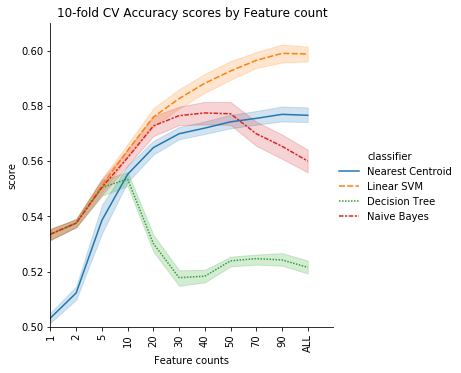

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.relplot(x="x", y="score", kind="line", hue="classifier", style="classifier", data=df_trace)
plt.xticks(range(len(feature_counts)), feature_counts, rotation='vertical')
plt.xlabel("Feature counts")
plt.title("10-fold CV Accuracy scores by Feature count")
axes = plt.gca()
axes.set_ylim([0.5,0.61])
axes.set_xlim([0,len(feature_counts)])
plt.savefig('feature_cnt_eval_dota2.pdf')
plt.show()

Neat hyperparameter evaluation
----------

0 --- 1e-05
[0.59726944 0.60007555 0.59368591 0.59679421 0.60478169]
1 --- 0.0001
[0.59683773 0.60099293 0.59487318 0.597172   0.6054833 ]
2 --- 0.001
[0.59678377 0.60077708 0.59476525 0.59781963 0.60510551]
3 --- 0.01
[0.59694566 0.60072311 0.59465731 0.5977117  0.60483566]
4 --- 0.1
[0.59699962 0.60072311 0.59465731 0.5977117  0.6049436 ]
5 --- 1
[0.59624413 0.60039933 0.59535888 0.59614658 0.60737223]
6 --- 10
[0.53925854 0.52085694 0.53588775 0.5254466  0.5545901 ]
7 --- 100
[0.52290756 0.52377098 0.53437669 0.52663393 0.5203195 ]
8 --- 1000
[0.52431061 0.52101883 0.53453859 0.53143721 0.53402774]


C:\Users\Mathias\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


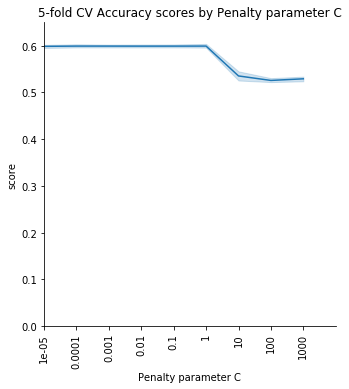

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC

df_vars_all = df_train.loc[:, df_train.columns != 'win']
df_vars = df_vars_all
df_vars = preprocessing.scale(df_vars)
df_class = df_train['win']

C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []
for idx, c in enumerate(C):
    print(idx, "---", c)
    clf = LinearSVC(C=c)
    scores = cross_validate(clf, df_vars, df_class, cv=5)['test_score']
    print(scores)
    for score in scores:
        results.append({'score': score, 'x':idx, 'penalty':c})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", data=df_trace)
plt.xticks(range(len(C)), C, rotation='vertical')
plt.xlabel("Penalty parameter C")
plt.title("5-fold CV Accuracy scores by Penalty parameter C")
axes = plt.gca()
axes.set_ylim([0.0,0.65])
axes.set_xlim([0,len(C)])
plt.savefig('scaled_amz_C_eval.pdf')
plt.show()